In [3]:
import pandas as pd

In [4]:
# reading the Data
df = pd.read_csv('netflix_titles.csv', encoding='latin1')

In [5]:
# Displaying the First five Rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [8]:
# Droping the unnecessary columns
df.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Filling the missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [11]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [12]:
# Droping some null rows
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Text(0.5, 1.0, 'MOVIES VS SHOWS')

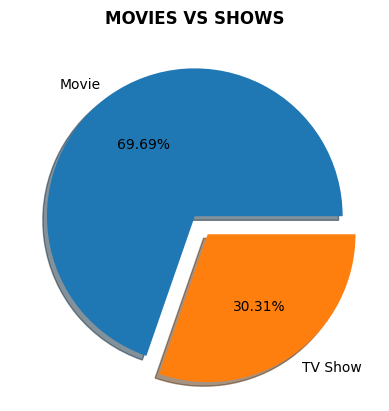

In [14]:
# Ploting the types with count
types = df['type'].value_counts()
labels = types.index
size = types.values
color = sns.color_palette('Paired')

plt.pie(size, labels=labels, autopct='%1.2f%%', shadow=True, explode=[0, 0.15])
plt.title('MOVIES VS SHOWS', fontweight='bold')

<Axes: ylabel='country'>

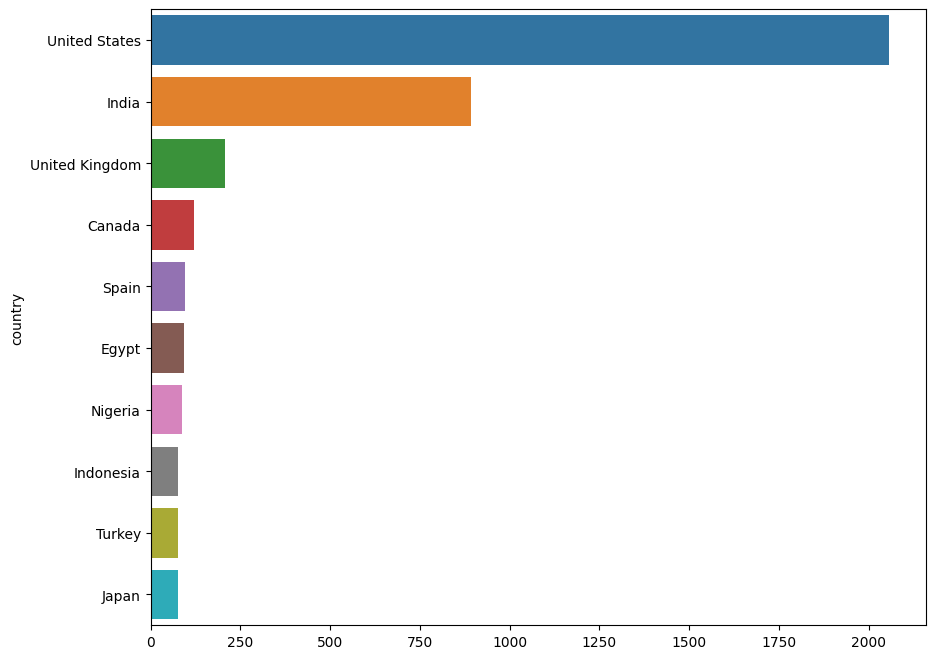

In [15]:
# Ploting which countries have highest number movies
movie_known_countries = df[(df['type'] == 'Movie') & (df['country'] != 'Unknown')]
largest_country_movies = movie_known_countries['country'].value_counts().nlargest(10).sort_values(ascending=False)

movie_known_countries_subset = movie_known_countries.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=largest_country_movies.values, y=largest_country_movies.index,
            data=movie_known_countries_subset, hue=largest_country_movies.index)

<Axes: ylabel='country'>

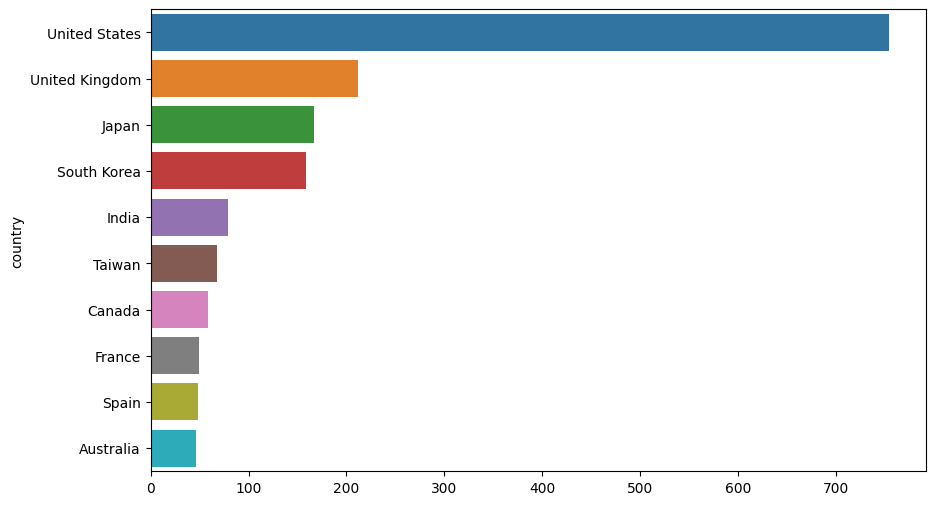

In [16]:
# Ploting which country have highest TV Number Shows
tvshow_known_countries = df[(df['type'] == 'TV Show') & (df['country'] != 'Unknown')]
largest_tvshow_countries = tvshow_known_countries.country.value_counts().nlargest(10).sort_values(ascending=False)

tvshow_subset = tvshow_known_countries.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=largest_tvshow_countries.values, y=largest_tvshow_countries.index, data=tvshow_subset,
            hue=largest_tvshow_countries.index)

<Axes: ylabel='director'>

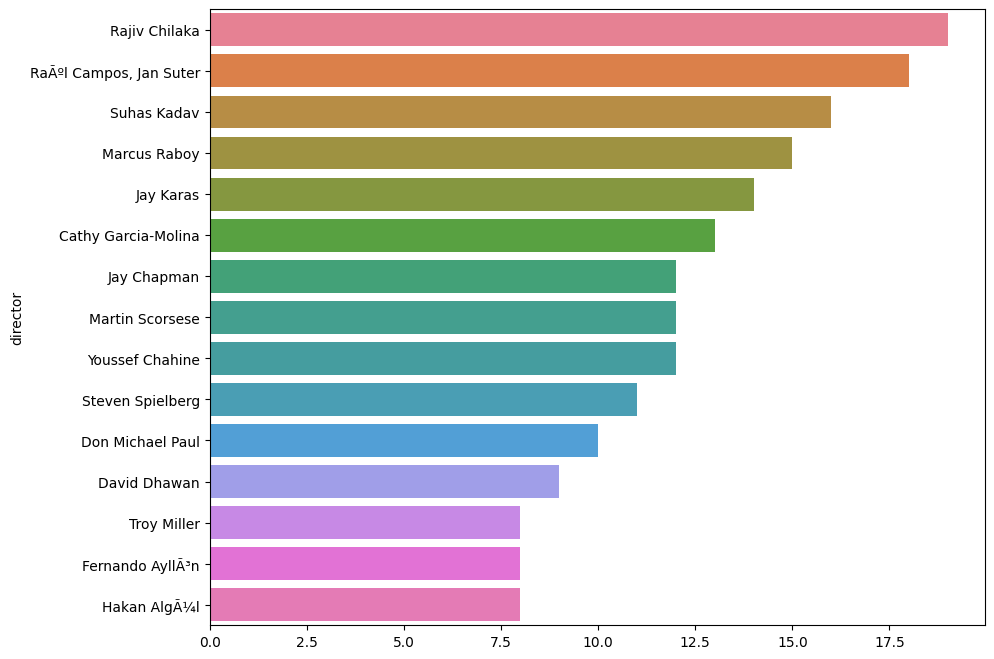

In [17]:
# ploting number of director makes movies
movies = df[(df['type']) == 'Movie']

top_movie_directors = movies[movies['director'] != 'Unknown']['director'].value_counts().nlargest(15).sort_values(ascending=False)

movies_subset = movies.head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_movie_directors.values, y=top_movie_directors.index,
            data=movies_subset, hue=top_movie_directors.index)


<Axes: ylabel='director'>

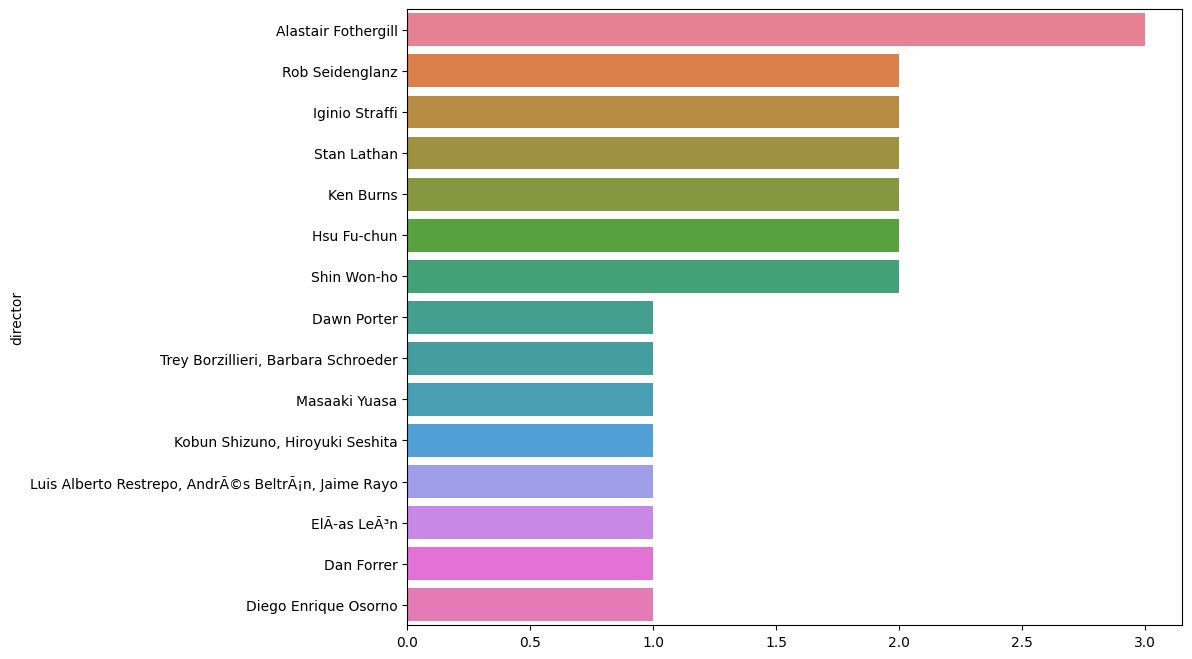

In [18]:
# Ploting Number of director makes tvshows
tvshows = df[(df['type']) == 'TV Show']

top_tvshow_director = tvshows[tvshows['director'] != 'Unknown']['director'].value_counts().nlargest(15).sort_values(ascending=False)

tvshows_subset = tvshows.head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_tvshow_director.values, y=top_tvshow_director.index,
            data=tvshows_subset, hue=top_tvshow_director.index)


<Axes: xlabel='year_added', ylabel='Count'>

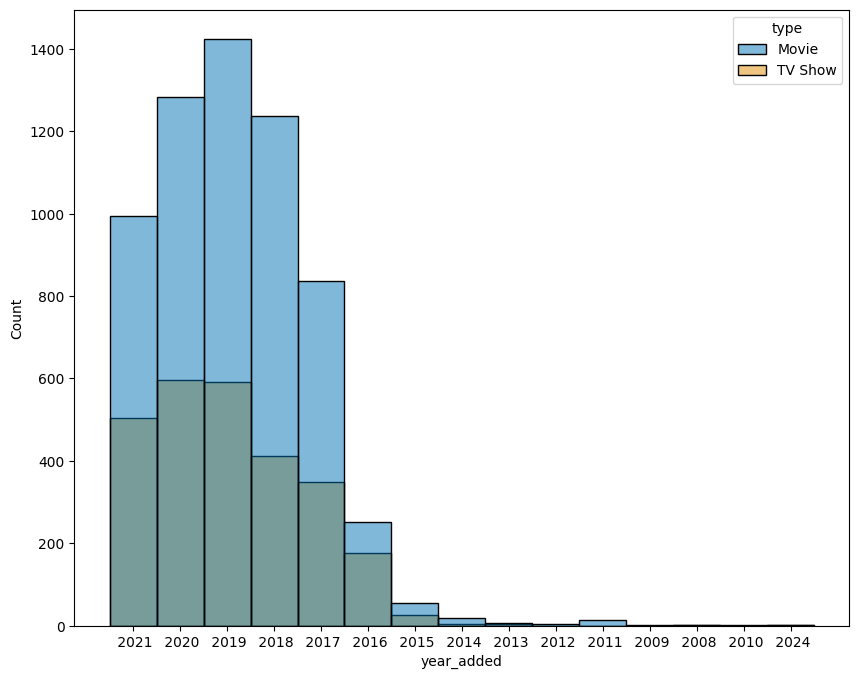

In [19]:
# The Distribution of Movies and tv show based on year
df['year_added'] = df['date_added'].apply(lambda x : x.split(',')[-1])


plt.figure(figsize=(10, 8))
sns.histplot(x=df['year_added'].sort_values(ascending=False), bins=30, hue='type', data=df, palette='colorblind')

In [20]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


Text(0.5, 1.0, 'Top 10 Most Frequent Genres on Netflix')

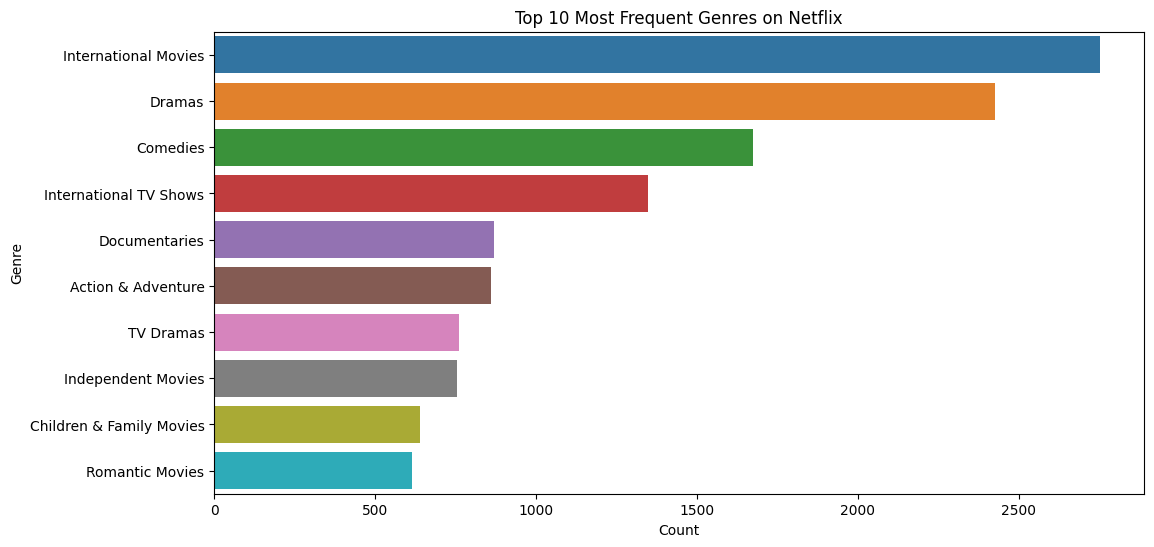

In [26]:
# Finding the top10 most frequent genres
from collections import Counter

# Spliting the 'listed_in' column into a list of genres
all_genres = df['listed_in'].str.split(', ')

# flatten the list of genres and count occurrence
flatlist = [genres for sublist in all_genres.dropna() for genres in sublist]
genre_counts = Counter(flatlist)

# Getting the top10 most frquent genres
top_10_genres = genre_counts.most_common(10)

# Creating a DataFrame for Ploting
genres_df = pd.DataFrame(top_10_genres, columns=['Genre', 'Count'])

# Ploting the most Frequent Genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genres_df, hue='Genre')
plt.title('Top 10 Most Frequent Genres on Netflix')